## Bengaluru House Price Preditction

In [1]:
# Importing important packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### About the dataset
* Area_type = Type of area it belongs
* Availability = Ready to move in
* Location = Location it belongs
* Size = Bedroom hall kitchen
* Society = Which society the flat belongs
* Total_sqft = total square feet
* bath = Total bathroom
* balcony = toal balcony
* Price = Output variable
### Loading the dataset

In [2]:
df = pd.read_csv("/Users/rahulinchal/Desktop/Data Science/Datasets/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

### Checking for duplicates

In [6]:
df.duplicated().sum()

529

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Dropping the duplicates

In [8]:
df.drop_duplicates(inplace = True)

### Checking for null values 

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

### Checking for shape 

In [10]:
df.shape

(12791, 9)

### Mathematical calculations

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Dropping uneccessary columns
#### area_type, availability and society doesn't make sense to be added in the model hence dropping is the only solution

In [13]:
df = df.drop(['area_type', 'availability', 'location', 'society'], axis = 1)

In [14]:
df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


### Lets feature engineer size column

In [15]:
#df['size'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [16]:
df[['bhk','useless']] = df['size'].str.split(' ', expand = True)

In [17]:
df.head()

,size,total_sqft,bath,balcony,price,bhk,useless
0,2 BHK,1056,2.0,1.0,39.07,2,BHK
1,4 Bedroom,2600,5.0,3.0,120.00,4,Bedroom
2,3 BHK,1440,2.0,3.0,62.00,3,BHK
3,3 BHK,1521,3.0,1.0,95.00,3,BHK
4,2 BHK,1200,2.0,1.0,51.00,2,BHK


In [18]:
df = df.drop(['useless', 'size'], axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  12791 non-null  object 
 1   bath        12718 non-null  float64
 2   balcony     12186 non-null  float64
 3   price       12791 non-null  float64
 4   bhk         12775 non-null  object 
dtypes: float64(3), object(2)
memory usage: 599.6+ KB


In [20]:
df.head()

,total_sqft,bath,balcony,price,bhk
0,1056,2.0,1.0,39.07,2
1,2600,5.0,3.0,120.00,4
2,1440,2.0,3.0,62.00,3
3,1521,3.0,1.0,95.00,3
4,1200,2.0,1.0,51.00,2


In [21]:
df.bhk.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [22]:
df.isnull().sum()

total_sqft      0
bath           73
balcony       605
price           0
bhk            16
dtype: int64

In [23]:
bath_mode = df['bath'].mode()[0]
balcony_mode = df['balcony'].mode()[0]
bhk_mode = df['bhk'].mode()[0]

In [24]:
df['bath'] = df['bath'].replace(np.nan, bath_mode).astype(int)
df['balcony'] = df['balcony'].replace(np.nan, balcony_mode).astype(int)
df['bhk'] = df['bhk'].replace(np.nan, bhk_mode).astype(int)

In [25]:
df.isnull().sum()

total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [26]:
df['bath'].unique()

array([ 2,  5,  3,  4,  6,  1,  9,  8,  7, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  12791 non-null  object 
 1   bath        12791 non-null  int64  
 2   balcony     12791 non-null  int64  
 3   price       12791 non-null  float64
 4   bhk         12791 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 599.6+ KB


### Lets take care of total_sqft

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df[~df['total_sqft'].apply(is_float)]

,total_sqft,bath,balcony,price,bhk
30,2100 - 2850,4,0,186.000,4
56,3010 - 3410,2,2,192.000,4
81,2957 - 3450,2,2,224.500,4
122,3067 - 8156,4,0,477.000,4
137,1042 - 1105,2,0,54.005,2
...,...,...,...,...,...
12975,850 - 1060,2,0,38.190,2
12990,1804 - 2273,3,0,122.000,3
13059,1200 - 1470,2,0,72.760,2
13240,1020 - 1130,2,2,52.570,1


### Lets write the function to take the middle value of teh range for sqft

In [30]:
def to_num(x):
    a = x.split('-')
    if len(a) == 2:
        return ((float(a[0]) + float(a[1])))/2
    try:
        return x
    except:
        return None

In [31]:
df.head()

,total_sqft,bath,balcony,price,bhk
0,1056,2,1,39.07,2
1,2600,5,3,120.00,4
2,1440,2,3,62.00,3
3,1521,3,1,95.00,3
4,1200,2,1,51.00,2


In [32]:
df['total_sqft'] = df['total_sqft'].apply(to_num)

In [33]:
df = df[df['total_sqft'].apply(is_float)]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12745 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  12745 non-null  object 
 1   bath        12745 non-null  int64  
 2   balcony     12745 non-null  int64  
 3   price       12745 non-null  float64
 4   bhk         12745 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 597.4+ KB


In [35]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [36]:
def to_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [37]:
df['total_sqft'] = df['total_sqft'].astype(int)

In [38]:
#df[~df['total_sqft'].apply(to_int)]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12745 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  12745 non-null  int64  
 1   bath        12745 non-null  int64  
 2   balcony     12745 non-null  int64  
 3   price       12745 non-null  float64
 4   bhk         12745 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 597.4 KB


In [40]:
df.head()

,total_sqft,bath,balcony,price,bhk
0,1056,2,1,39.07,2
1,2600,5,3,120.00,4
2,1440,2,3,62.00,3
3,1521,3,1,95.00,3
4,1200,2,1,51.00,2


In [41]:
df.shape

(12745, 5)

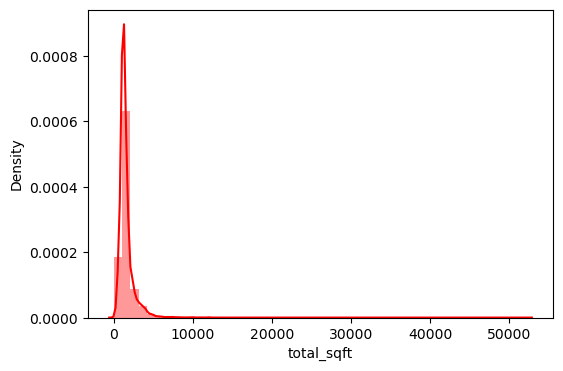

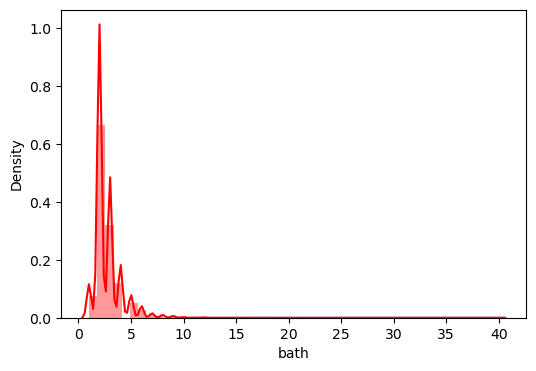

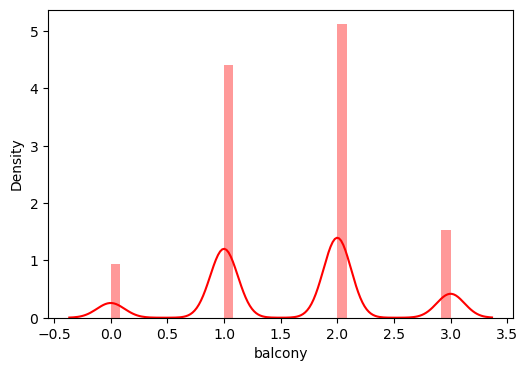

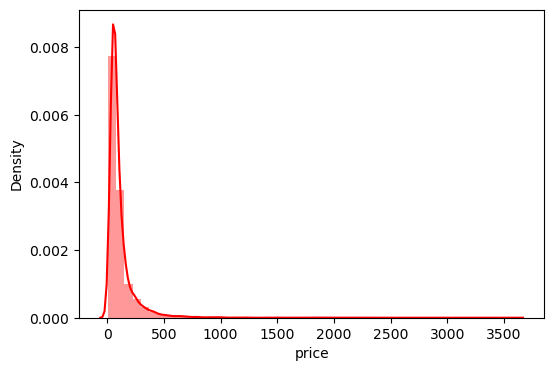

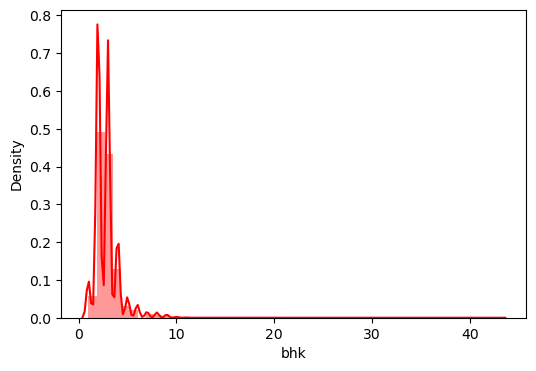

In [42]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.distplot(df[i], color = 'r')
    plt.show()

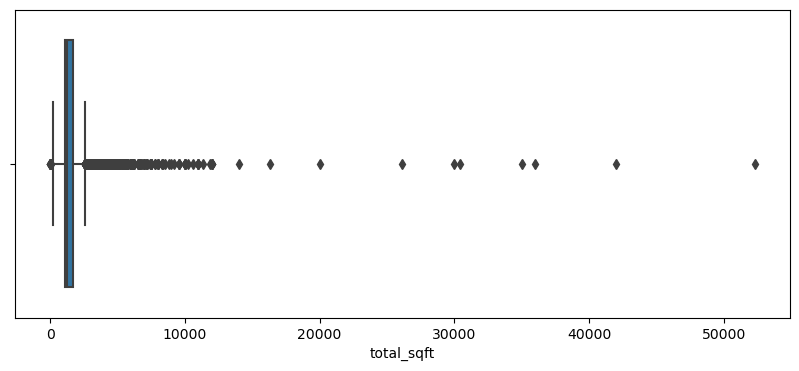

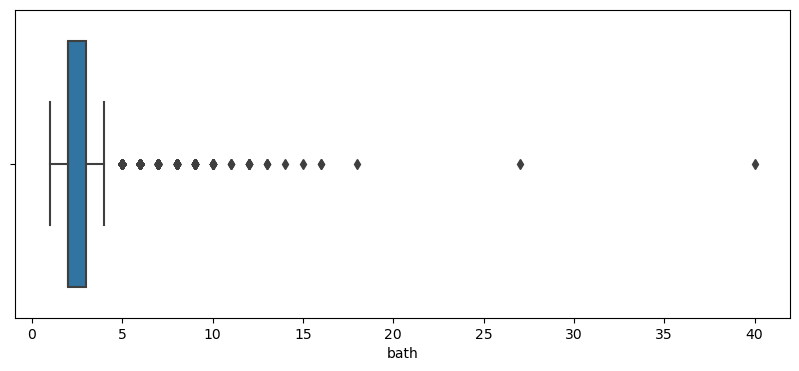

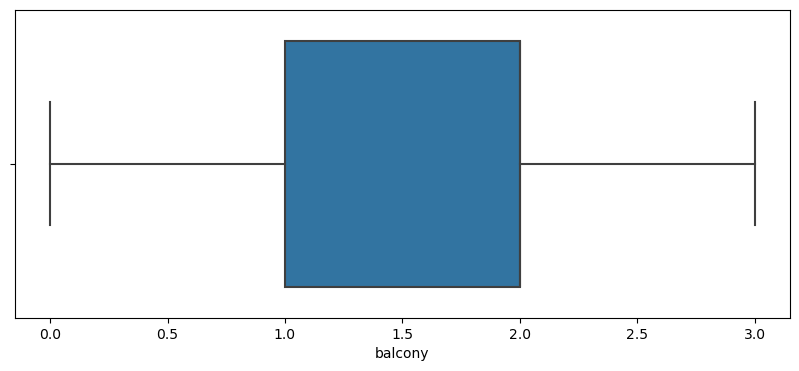

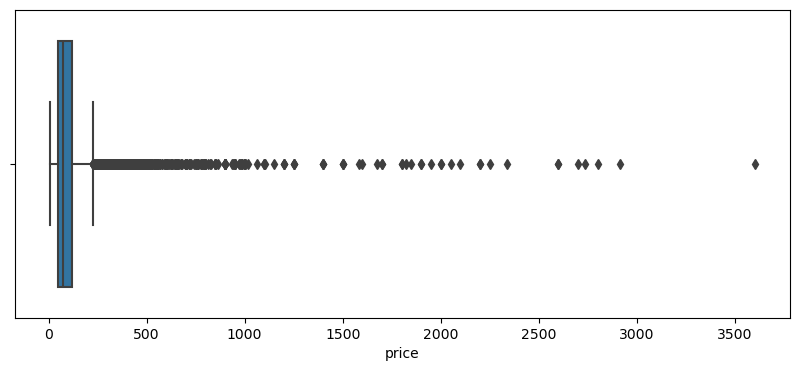

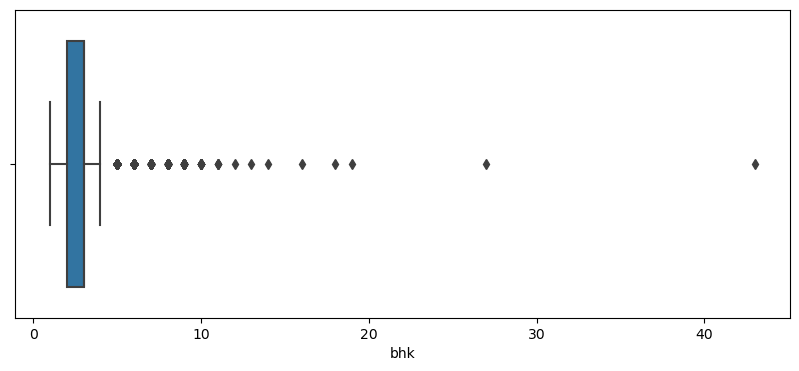

In [43]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = df[i])
    plt.xlabel(i)
    plt.show()

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12745.0,1569.597489,1259.833771,1.0,1100.0,1280.0,1691.0,52272.0
bath,12745.0,2.703099,1.352340,1.0,2.0,2.0,3.0,40.0
balcony,12745.0,1.603295,0.807231,0.0,1.0,2.0,2.0,3.0
price,12745.0,114.207350,151.591687,8.0,50.0,73.0,120.0,3600.0
bhk,12745.0,2.815771,1.308425,1.0,2.0,3.0,3.0,43.0


In [45]:
df['bhk'].value_counts()

bhk
2     5251
3     4641
4     1393
1      629
5      346
6      220
7       99
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [46]:
df = df[df['bath'] <= 4 ]

In [47]:
df = df[df['total_sqft'] < 2100]

In [48]:
df = df[df['bhk'] <= 4]

In [49]:
df = df[df['total_sqft'] > 450]

In [50]:
#df['price'] = np.sqrt(df['price'])

In [51]:
df.head()

,total_sqft,bath,balcony,price,bhk
0,1056,2,1,39.07,2
2,1440,2,3,62.00,3
3,1521,3,1,95.00,3
4,1200,2,1,51.00,2
5,1170,2,1,38.00,2


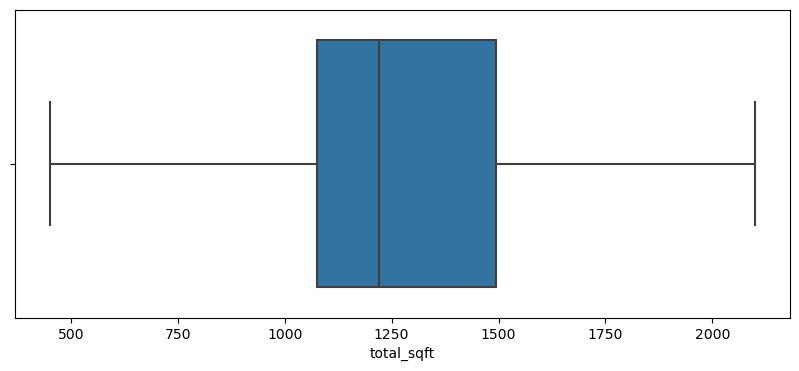

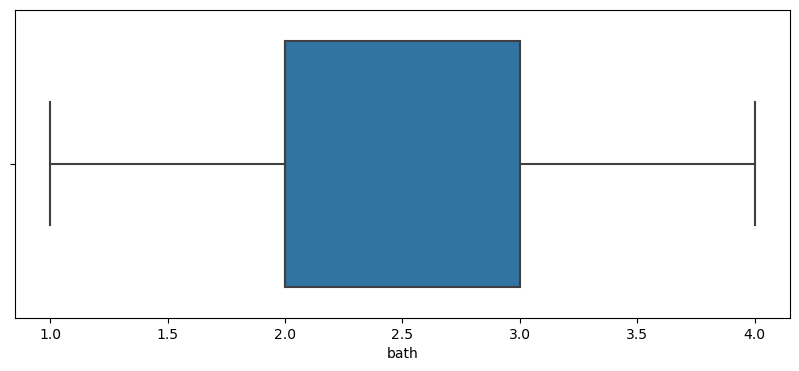

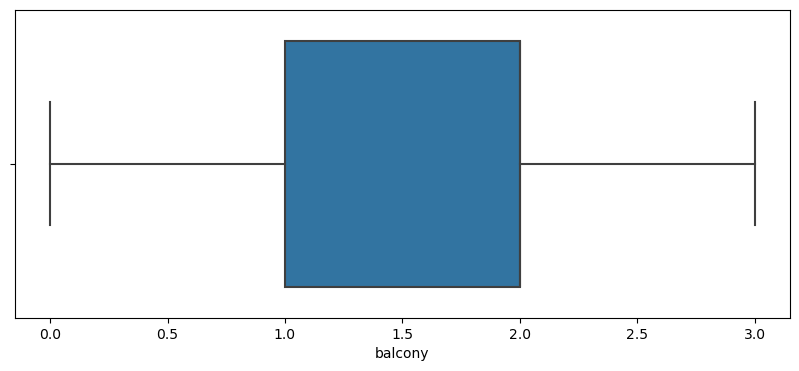

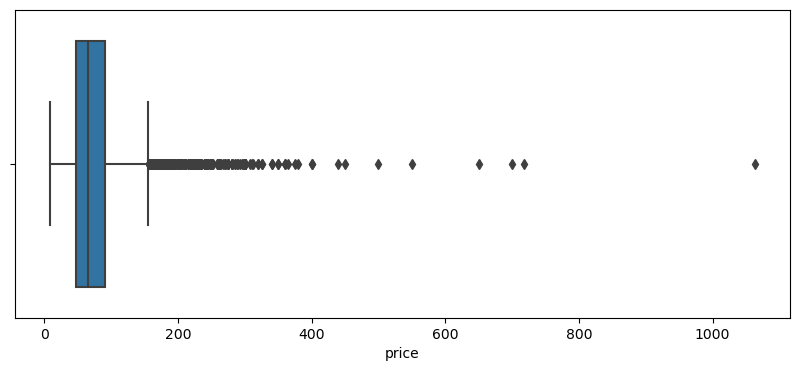

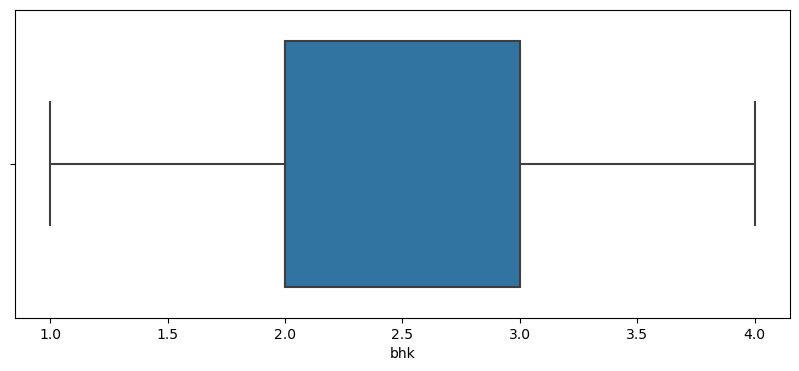

In [52]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = df[i])
    plt.xlabel(i)
    plt.show()

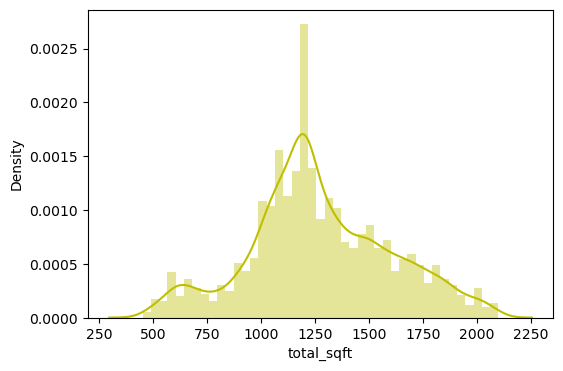

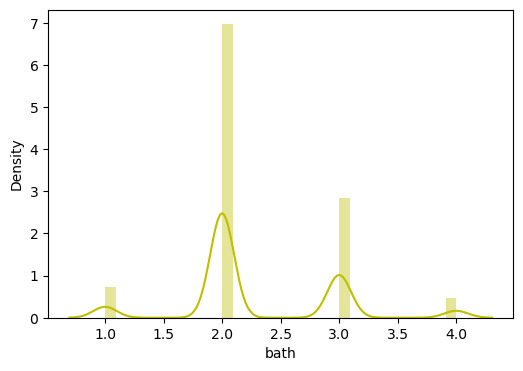

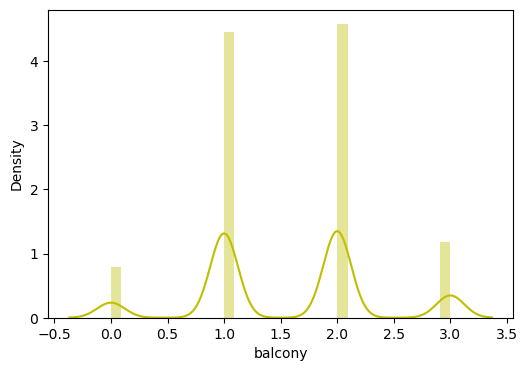

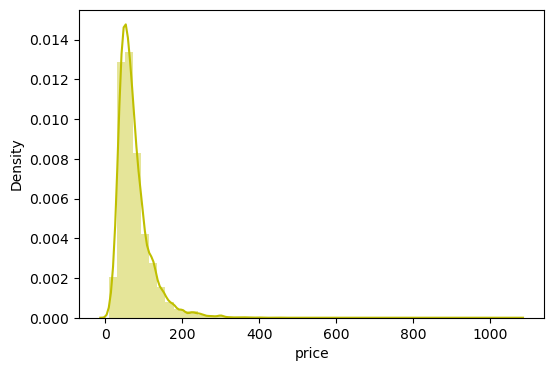

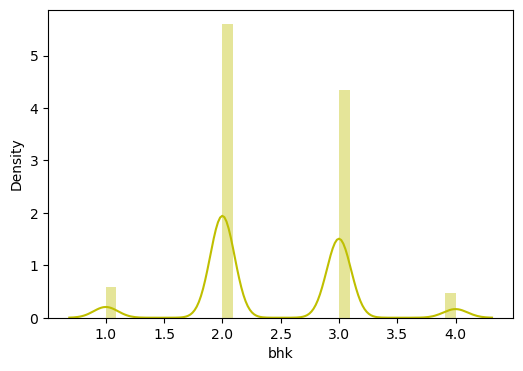

In [53]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.distplot(df[i], color = 'y')
    plt.xlabel(i)
    plt.show()

### model building

In [54]:
x = df.drop(['price'], axis = 1).values
y = df['price'].values

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 32)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
lr_pred = lr.predict(x_test)

In [61]:
lr_pred

array([ 67.46276418,  51.72479682,  15.03993669, ..., 113.61926733,
       112.34619703,  91.46784413])

In [62]:
y_test

array([ 45.84,  30.  ,  33.  , ..., 120.  , 160.  ,  54.  ])

In [63]:
print(lr.score(x_train, y_train)*100)
print(lr.score(x_test, y_test)*100)

36.63459451326442
30.406724918396055


In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
print(round(((cross_val_score(lr, x_train, y_train)).mean())*100,2))
print(round(((cross_val_score(lr, x_test, y_test)).mean())*100,2))

36.42
32.56


### Performance Matrix

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

In [67]:
print(f'Mean Absolute Error = {mean_absolute_error(y_test, lr_pred)}')
print(f'Mean Squared Error = {mean_squared_error(y_test, lr_pred)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test, lr_pred))}')
print(f'r2 = {r2_score(y_test, lr_pred)}')

Mean Absolute Error = 23.016917694031587
Mean Squared Error = 1744.3192429533244
Root Mean Squared Error = 41.765048101891665
r2 = 0.30406724918396055


### Decision tree regressor 

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print("Predicted_Values: \n",dt_pred)
print("\nActual_Values: \n",y_test)

print("\nTraining Score: ",round(dt.score(x_train, y_train)*100,2))
print("Testing Score: ",round(dt.score(x_test, y_test)*100,2))

#Cross val score
print("\nTraining Cross Val Score: ",round(((cross_val_score(dt, x_train, y_train)).mean())*100,2))
print("Testing Cross Val Score: ", round(((cross_val_score(dt, x_test, y_test)).mean())*100,2))

Predicted_Values: 
 [ 66.905       33.03        32.         ... 102.5        126.66666667
  71.998     ]

Actual_Values: 
 [ 45.84  30.    33.   ... 120.   160.    54.  ]

Training Score:  75.55
Testing Score:  20.37

Training Cross Val Score:  25.69
Testing Cross Val Score:  -14.69


### Performance matrix

In [69]:
print(f'Mean Absolute Error = {mean_absolute_error(y_test, dt_pred)}')
print(f'Mean Squared Error = {mean_squared_error(y_test, dt_pred)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test, dt_pred))}')
print(f'r2 = {r2_score(y_test, dt_pred)}')

Mean Absolute Error = 23.086032020844502
Mean Squared Error = 1995.9182677876279
Root Mean Squared Error = 44.675701088932314
r2 = 0.20368654068526104


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = dt.predict(x_test)
print("Predicted_Values: \n",rf_pred)
print("\nActual_Values: \n",y_test)

print("\nTraining Score: ",round(rf.score(x_train, y_train)*100,2))
print("Testing Score: ",round(rf.score(x_test, y_test)*100,2))

#Cross val score
print("\nTraining Cross Val Score: ",round(((cross_val_score(rf, x_train, y_train)).mean())*100,2))
print("Testing Cross Val Score: ", round(((cross_val_score(rf, x_test, y_test)).mean())*100,2))

Predicted_Values: 
 [ 66.905       33.03        32.         ... 102.5        126.66666667
  71.998     ]

Actual_Values: 
 [ 45.84  30.    33.   ... 120.   160.    54.  ]

Training Score:  72.22
Testing Score:  37.7

Training Cross Val Score:  38.09
Testing Cross Val Score:  27.62


### Performance matrix

In [71]:
print(f'Mean Absolute Error = {mean_absolute_error(y_test, rf_pred)}')
print(f'Mean Squared Error = {mean_squared_error(y_test, rf_pred)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test, rf_pred))}')
print(f'r2 = {r2_score(y_test, rf_pred)}')

Mean Absolute Error = 23.086032020844502
Mean Squared Error = 1995.9182677876279
Root Mean Squared Error = 44.675701088932314
r2 = 0.20368654068526104
